# Rainfall Prediction - Weather Forecasting

Problem Statement:

# Rain Prediction –Weather forecasting

Here, predict two things:

# Dataset Description:

# Importing Necessary Libraries

In [1]:
# Necessry libraries
import pandas as pd
import numpy as np

#Data Visulaziation
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Displaying all columns

In [3]:
pd.set_option("display.max_columns",None)
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


This shows all the columns of the dataset including target column.


# Exploratory Data Analysis (EDA)

In [4]:
#checking the shape of the dataset
df.shape

(8425, 23)

The dataset contains 8425 rows and 23 columns.

In [5]:
#checking the columns of the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# getting all the columns in List form
df.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

We have these columns in the dataset. As we have to predict the rainfall for toromorrow and the amount of rainall we will see the co relation of all the features with these two targets.

In [7]:
#Getting information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

This gives the information about the dataset which includes indexing type,column type, non null values and memory usage.

The dataset contains two types of data namely float datatype and object datatype.

In [8]:
#checking the data types of the dataset
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
#checking the unique numbers of the dataset
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

Our target variable 'RainTomorrow' has 2 classes making it a classification problem while predicting tomorrows rainfall and the other target Rainfall is a continuous data making it a regression problem.

In [10]:
#checkig the null values of the dataset
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

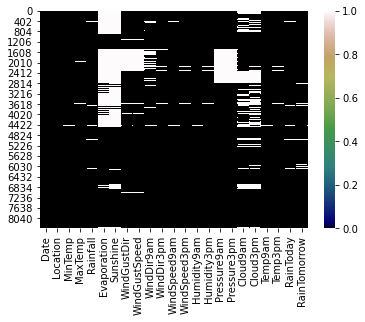

In [11]:
# Lets visualize the null values
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

The dataset have Null values in all the features except Date and Location columns.

In [12]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('/////////////////////////////////////////////////////////////')

2011-03-24    5
2011-05-07    5
2011-03-28    5
2011-03-21    5
2011-05-01    5
             ..
2013-03-31    1
2013-01-16    1
2013-05-01    1
2013-05-06    1
2012-11-29    1
Name: Date, Length: 3004, dtype: int64
/////////////////////////////////////////////////////////////
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
/////////////////////////////////////////////////////////////
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 14.8    67
         ..
-1.5      1
 25.9     1
-0.8      1
-1.4      1
-1.1      1
Name: MinTemp, Length: 285, dtype: int64
/////////////////////////////////////////////////////////////
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 3

From the value counts we can see that the target variable rain tomorrow is imbalanced, will use SMOTE later

In [13]:
# Checking the number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


# Feature Engineering and Data Cleaning

In [14]:
# Converting object datatype to datetime64 datatype
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# Again checking the datatype of the dataset
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

Datatype of 'date' column is successfuly changed.

In [16]:
#Extracting Day from Date_of_journey column
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

#Extracting Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month

#Extracting Year from Date_of_journey column
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

Now we have extracted day, month and year columns from 'Date' column. Now we can drop 'Date' columns.

In [17]:
# Droppimg the 'Date' column
df.drop(columns=['Date'],axis=1,inplace=True)

In [18]:
# Again checking the dataset
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


Date column is dropped now.

# Treating the Null Values by Imputation

In [19]:
#Filling null values in MinTemp with it's mean
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#Fillinf null values in Rainfall with it's mode, as most of the rows have 0 rainfall.
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [20]:
# Again checking the Null values after filling.
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

Now there is no null values present in the dataset.

<AxesSubplot:>

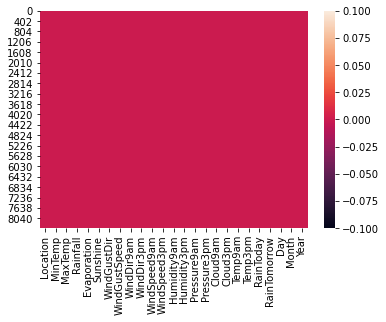

In [21]:
# Visualizing the null values
sns.heatmap(df.isnull())

We can clearly see that we have successfully treated all the null values and we dont have any null values in the dataset

# Statistical Overview of the Dataset

In [22]:
# statistical summary of numerical columns
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.319872,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

# Separating numerical and categorical columns

In [23]:
# Checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("____________________________________________________________________________________________________________________")

# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)

Categorical columns are:
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
____________________________________________________________________________________________________________________
Numerical columns are:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


# Data Visualization

# Univariate Analysis of the categorical columns

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


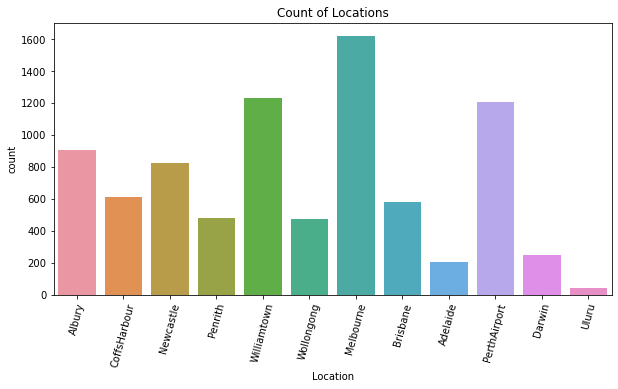

In [24]:
# Visualizing the various Locations present in the dataset
print(df['Location'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=75)
plt.show()

We observe that the Melbourne is having hishest rainfall i.e. 1622 and Uluru is having least rainfall i.e. 39 only.

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


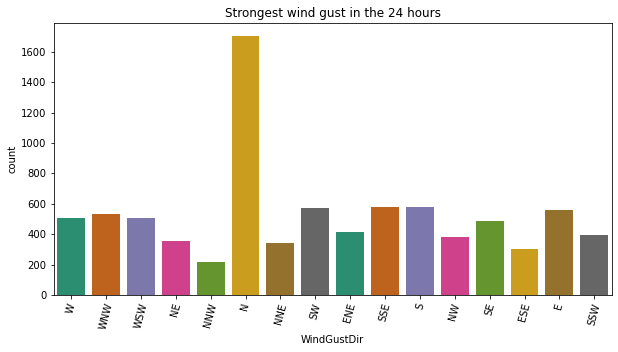

In [25]:
# Visualizing the direction of the strongest wind gust in the 24 hours to midnight
print(df['WindGustDir'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(df["WindGustDir"],palette='Dark2')
plt.title("Strongest wind gust in the 24 hours")
plt.xticks(rotation=75)
plt.show()

We can clearly see that the wind gust was strongest towards the north i.e. 1704

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


<AxesSubplot:title={'center':'Direction of the wind at 9am'}, xlabel='WindDir9am', ylabel='count'>

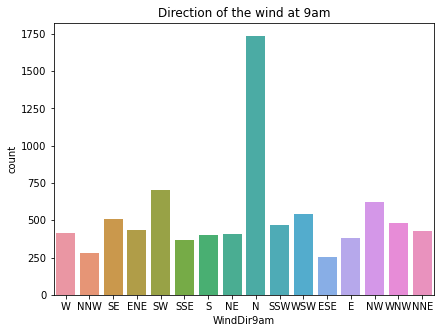

In [26]:
#Visualization of wind at 9 am.
print(df['WindDir9am'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'])

We can observe thet the Direction of the wind at 9am is towards North.

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


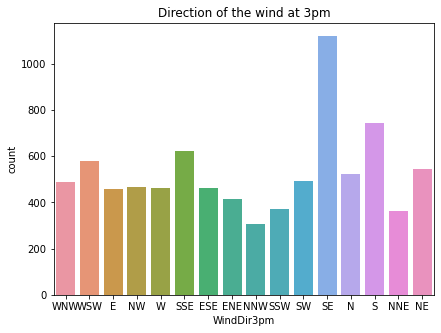

In [27]:
#Visualization of wind at 3pm.
print(df['WindDir3pm'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'])
plt.show()

We can observe thet the Direction of the wind at 3pm is towards South East.

No     6435
Yes    1990
Name: RainToday, dtype: int64


<AxesSubplot:title={'center':'RainToday'}, xlabel='RainToday', ylabel='count'>

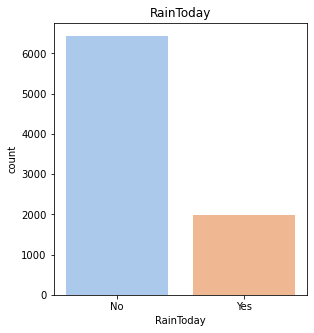

In [28]:
#Visualization of Rainfall today:
print(df['RainToday'].value_counts())
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='pastel')

we can observe that the RainToday is having very less count compare to No.

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


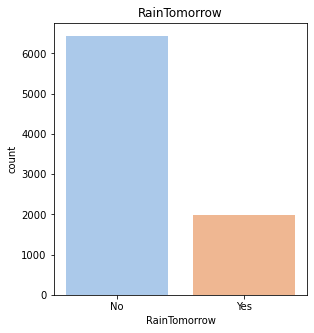

In [29]:
#Visualization of Rainfall tomorrow:
print(df['RainTomorrow'].value_counts())
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

we can observe that the RainTomorrow is having very less count compare to No.
We will see the corelation later and do the feature selection

# Visualizing the distribution of the numerical columns

In [30]:
# Checking the length of numnerical column
len(numerical_col)

19

we have 19 numerical columns.

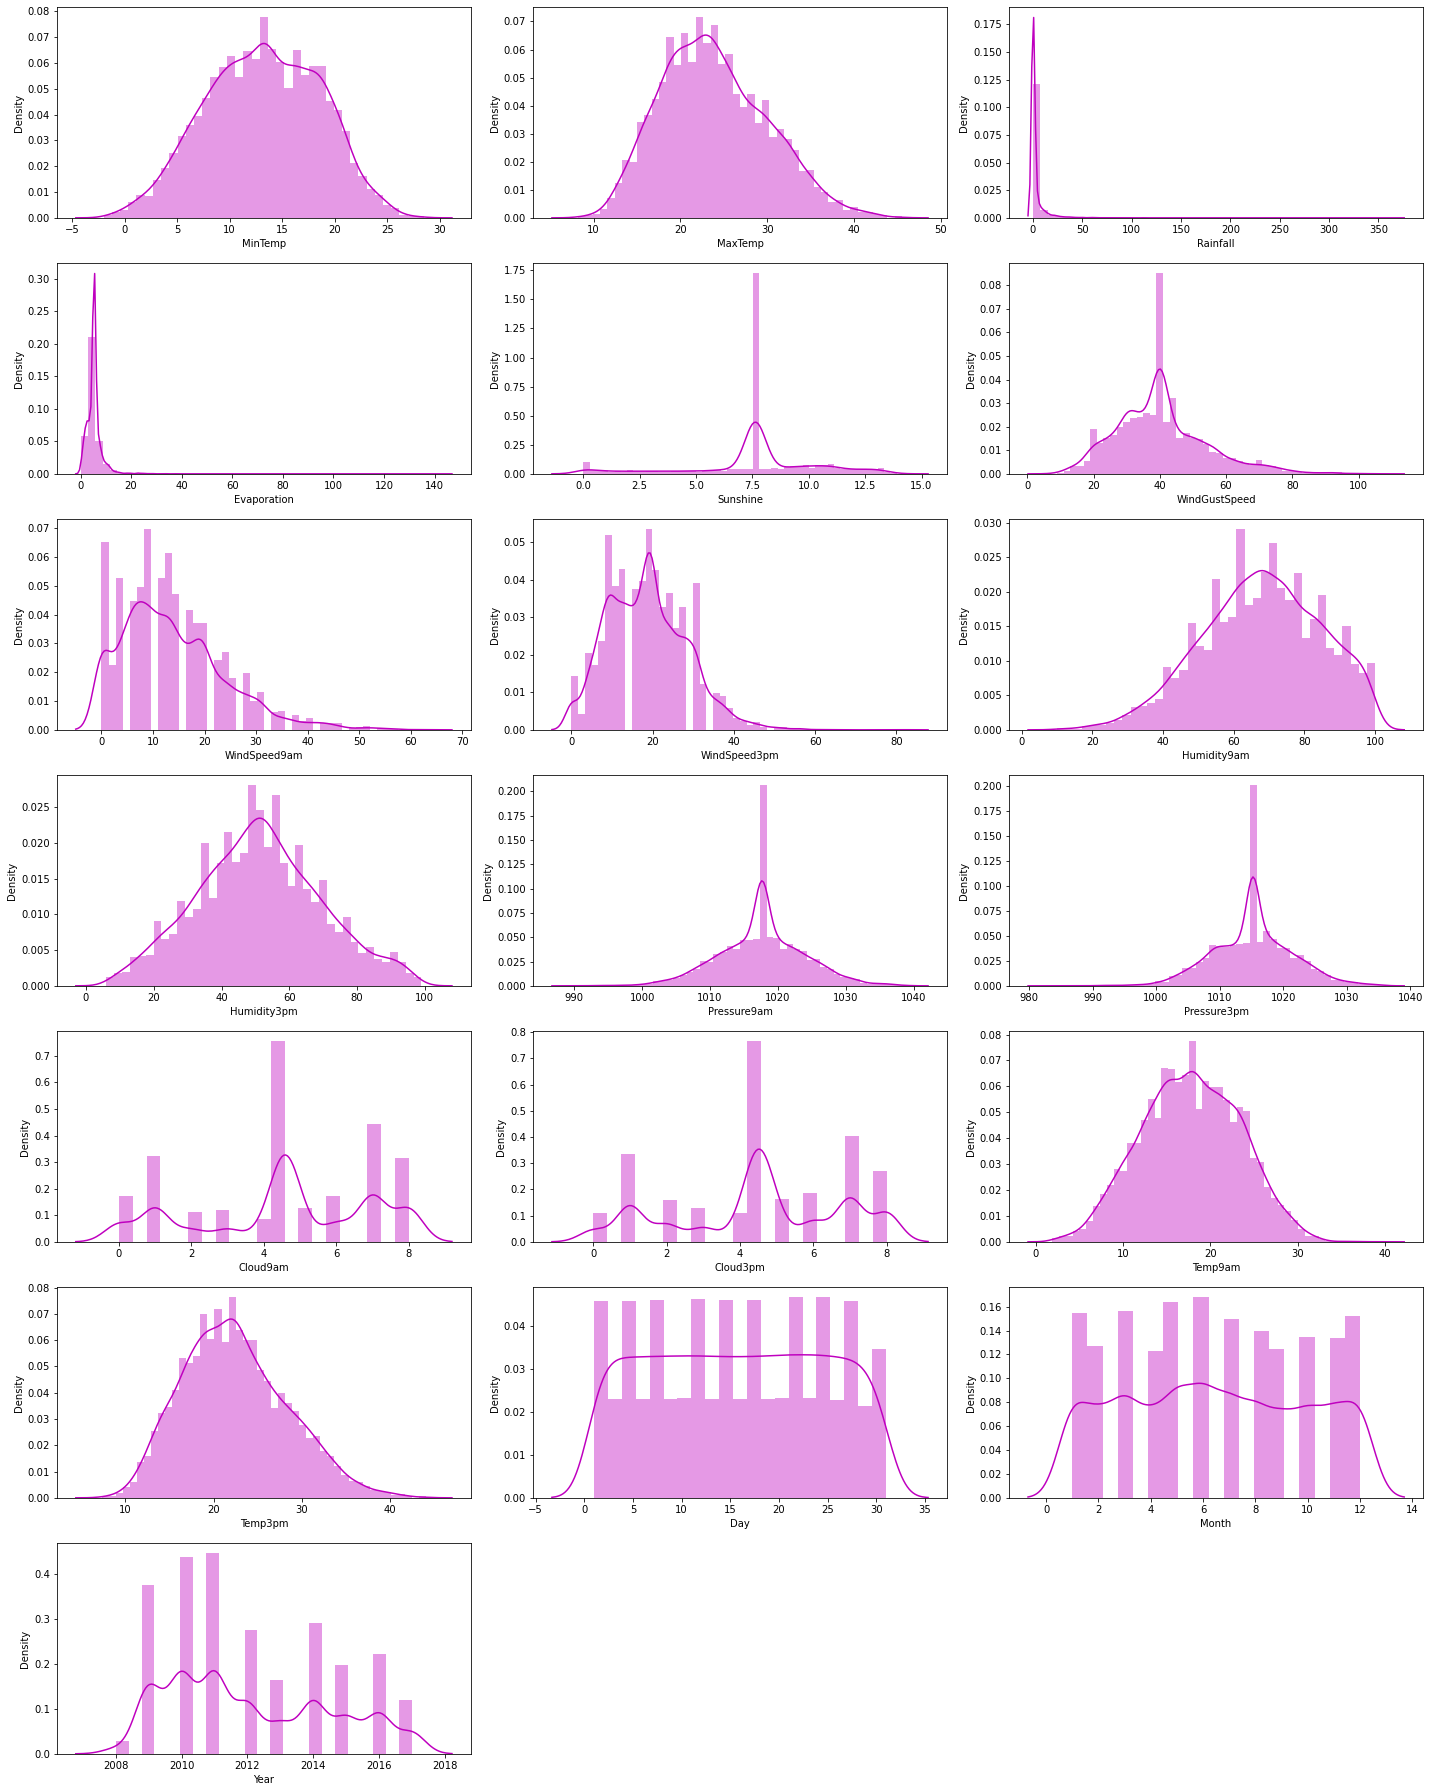

In [31]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the graphs we can say that the dataset is not normally distributed.

Min Temp and Humidity3pm is normally distributed.

Max Temp,Rainfall,Evaporation,WindGustSpeed, WindSpeed9am,WindSpeed3pm. is slightly skewed right.

Cloud3pm,Temp9am,Temp3pm,Day, Month and Year has no skewness however the data is not normally distributed.

Humidity9am is slightly skewed left.

Sunshine is not normally distributed.

# Bivariate Analysis

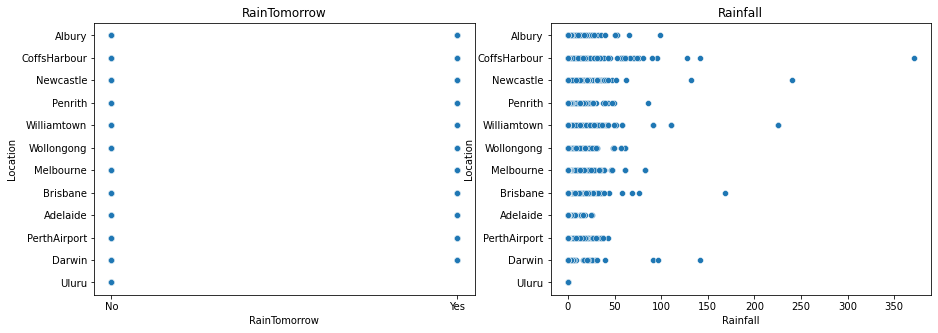

In [32]:
#checking the corelation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

We can see that location does not have any kmajot impact on the prediction of rainfall, however we will not drop the feature as prediction is done as per reigion.

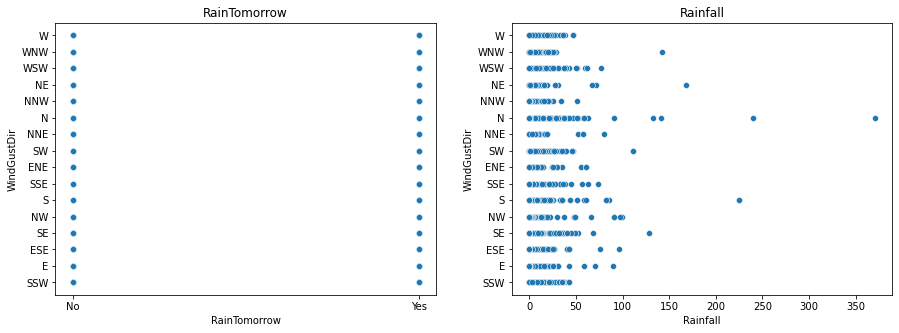

In [33]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

From this graph we can observe that we see no linear relation of the feature with both the targets.

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

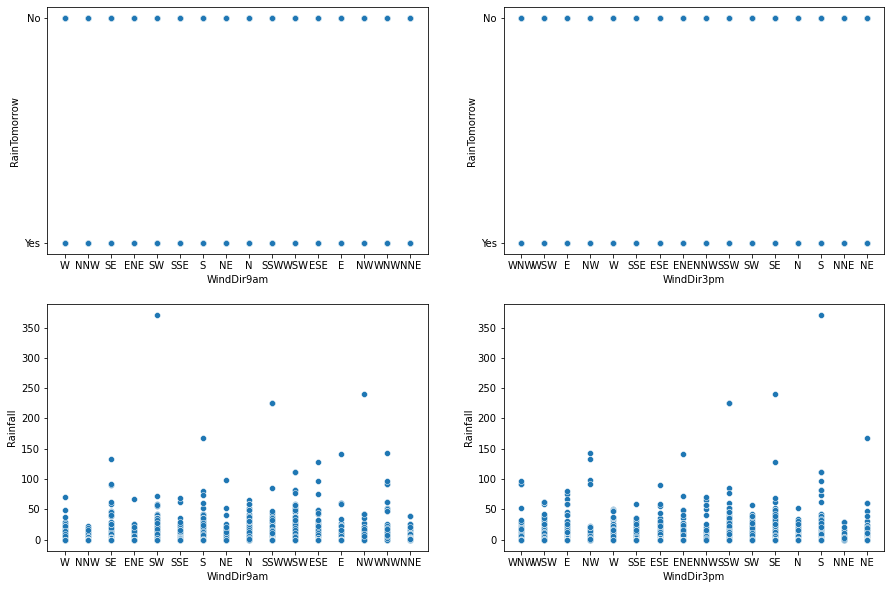

In [34]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We donot see any linear relation either

Checking the relation between Rainfall today and Rainfall Tomorrow.

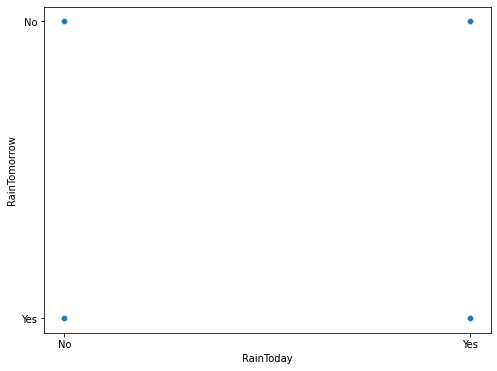

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainToday'],y=df['RainTomorrow'])
plt.show()

There is no relation that we can see.

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

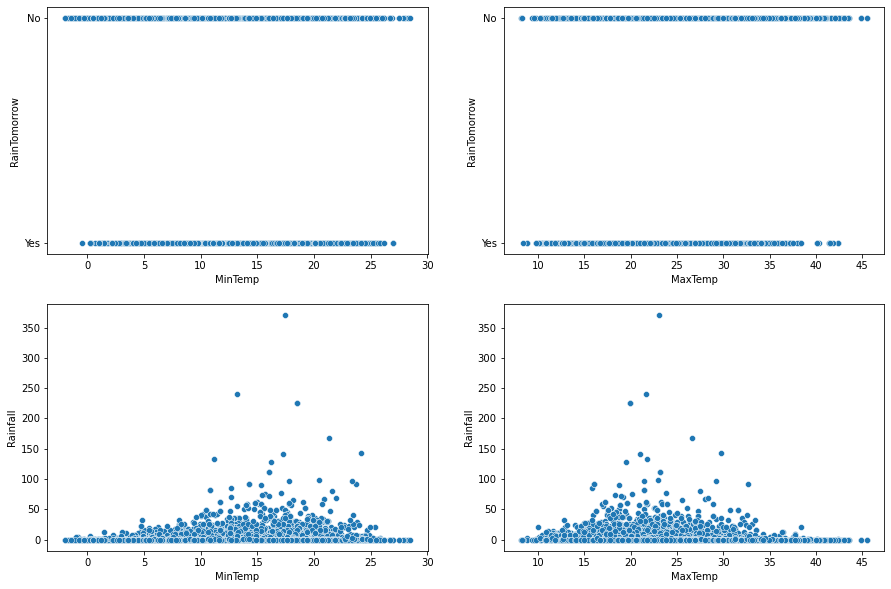

In [36]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We can clearly see from the plotted graphs that there is no linear relation of max temp and min temp with both the targets.

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

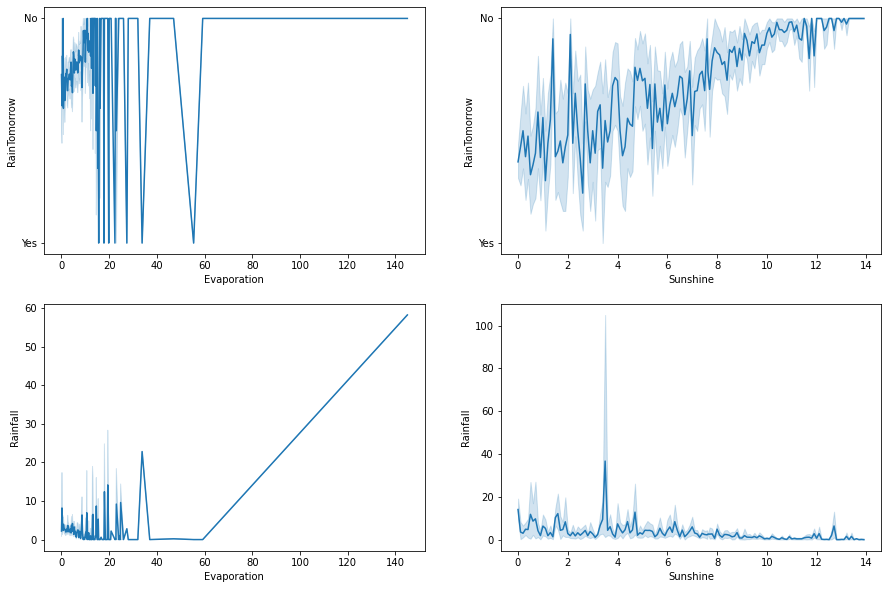

In [37]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We can clearly see the relation in the graphs.

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

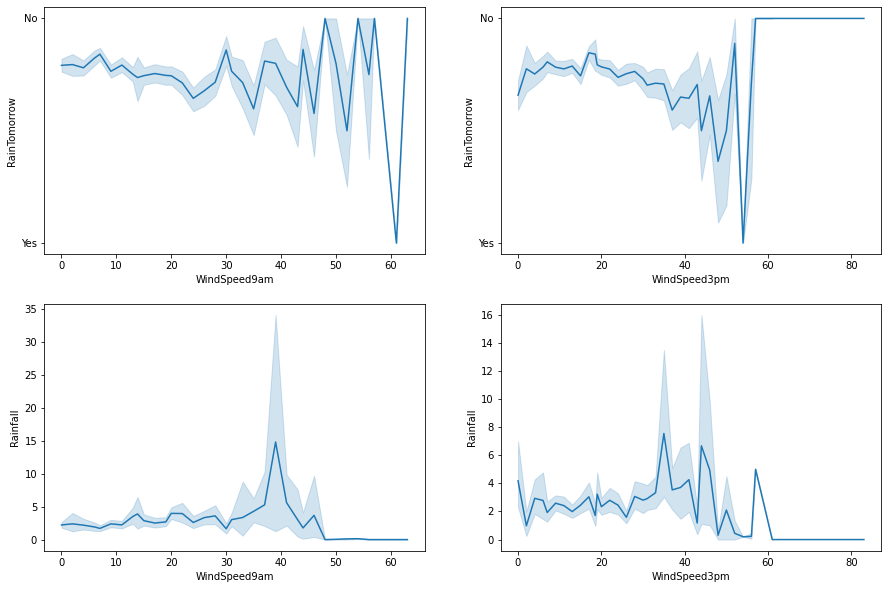

In [38]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

There is no linear relaion seen.

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

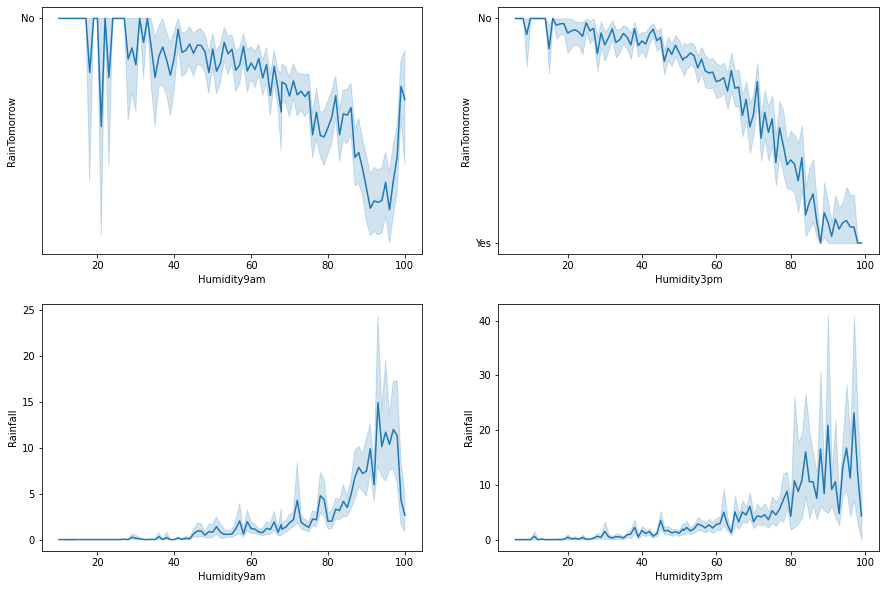

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Here we can see a inverse relation in humidity with rain tomorrow and positive relation between humidity and Rainfall.

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

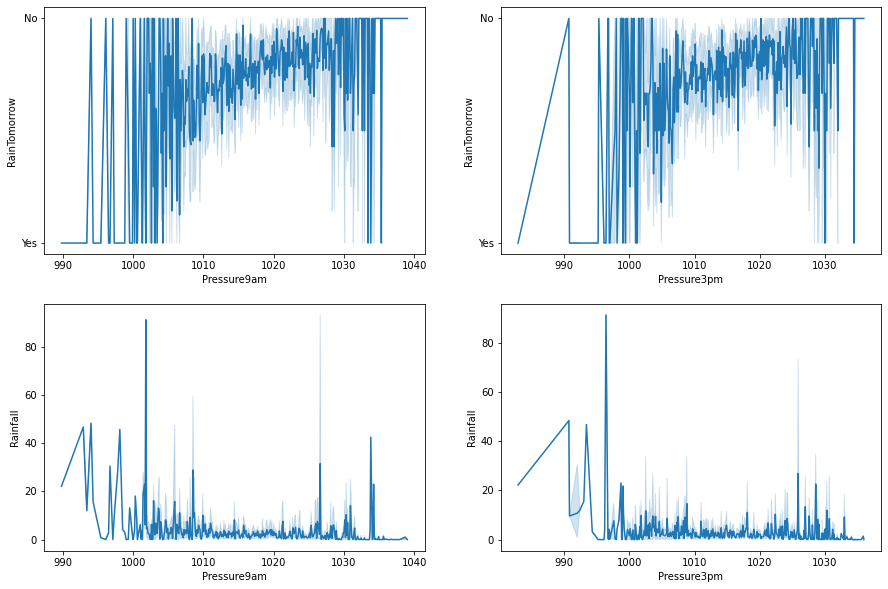

In [40]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Pressure9am and Rainfall
sns.lineplot(x='Pressure9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and Rainfall
sns.lineplot(x='Pressure3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

As the graph shows, we dont see an linear relation.

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

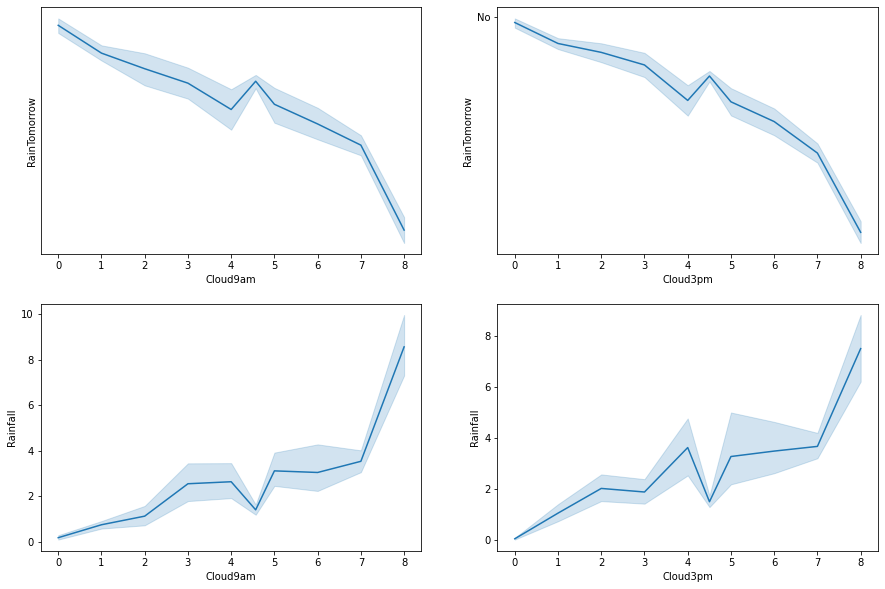

In [41]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

The graph shows a linear relationship, and inverse relation between could and rain tomorrow and a positive relation between could and rainfall.

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

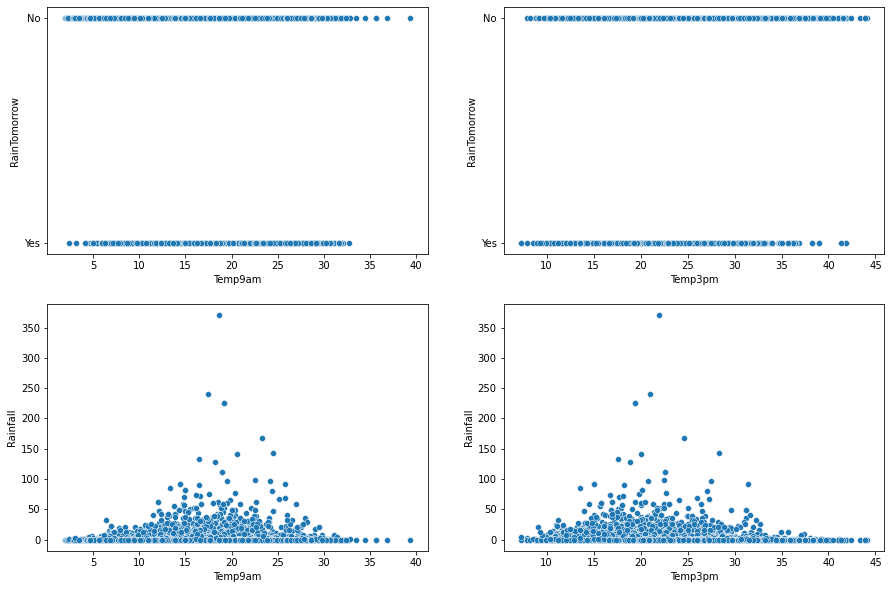

In [42]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

There is no linear relation that is seen in these plots.

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

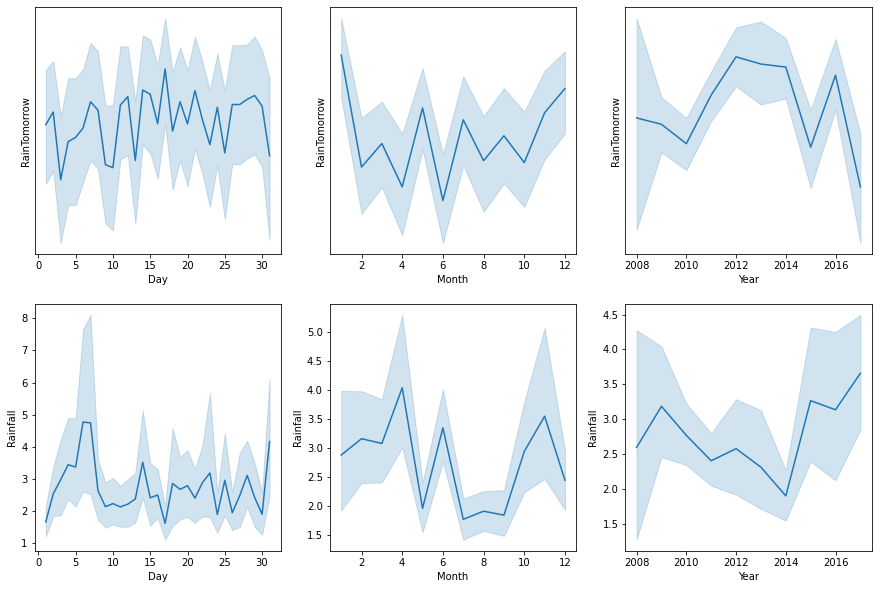

In [43]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

#checking the relation between Day and RainTomorrow
sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between Month and RainTomorrow
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1],palette="green",data=df)

#checking the relation between Year and RainTomorrow
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2],palette="green",data=df)

#checking the relation between Day and Rainfall
sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0],palette="purple",data=df)

#checking the relation between Month and Rainfall
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1],palette="purple",data=df)

#checking the relation between Year and Rainfall
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2],palette="purple",data=df)

It can be clearly seen that there is no linear relationship.

# Identifying the Outliers

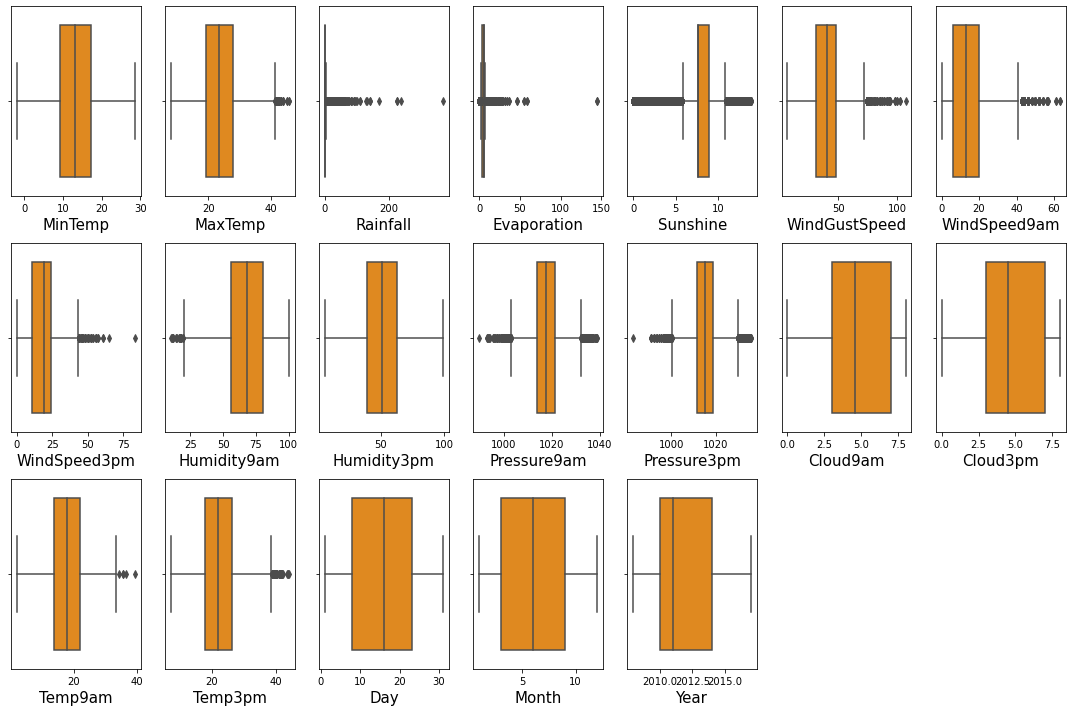

In [44]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From the above boxplots, we can see that features having outliers are: MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am,Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm

In [45]:
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Removing Outliers

In [46]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [47]:
feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]


z=np.abs(zscore(feature))

z


array([[1.57008852e-01, 2.06020811e-01, 2.30589346e-16, ...,
        1.30866453e+00, 1.53712470e-01, 1.08138052e-01],
       [2.02812062e-01, 2.64164519e-01, 2.30589346e-16, ...,
        1.19607152e+00, 1.00217155e-01, 3.12348332e-01],
       [3.00945038e-01, 2.64164519e-01, 2.30589346e-16, ...,
        1.05130907e+00, 5.77390162e-01, 1.27334323e-01],
       ...,
       [4.97210991e-01, 2.64164519e-01, 2.30589346e-16, ...,
        2.51552929e-01, 9.38310416e-01, 6.15098528e-01],
       [5.13566487e-01, 2.64164519e-01, 2.30589346e-16, ...,
        2.03298781e-01, 4.74684357e-01, 5.98279073e-01],
       [2.90531973e-15, 2.64164519e-01, 2.30589346e-16, ...,
        4.28484806e-01, 4.92516128e-01, 2.59513150e-01]])

In [48]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

# Checking the skewness of the dataset

In [49]:
new_df.skew().sort_values()

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
Rainfall         3.519090
dtype: float64

We can see that features, Sunshine, Rainfall, Evaporation, Windspeed9am, Windgustspeed has skewness.

# Removing skewness using log transformation

In [50]:
new_df["Sunshine"] = np.log1p(new_df["Sunshine"])
new_df["Rainfall"] = np.log1p(new_df["Rainfall"])
new_df["Evaporation"] = np.log1p(new_df["Evaporation"])
new_df["WindSpeed9am"] = np.log1p(new_df["WindSpeed9am"])
new_df["WindGustSpeed"] = np.log1p(new_df["WindGustSpeed"])

In [51]:
#checking skewness again
new_df.skew().sort_values()

Sunshine        -2.460672
WindSpeed9am    -1.186810
Evaporation     -0.993594
WindGustSpeed   -0.526267
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
Rainfall         1.811941
dtype: float64

We can here see that we have successfully removed all the outliers

# Encoding the categorical columns

In [52]:
le=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(le.fit_transform)
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.470004,1.85464,2.1555,13,3.806662,13,14,3.044522,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,1.85464,2.1555,14,3.806662,6,15,1.609438,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,1.85464,2.1555,15,3.850148,13,15,2.995732,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,1.85464,2.1555,4,3.218876,9,0,2.484907,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,0.693147,1.85464,2.1555,13,3.737670,1,7,2.079442,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.85464,2.1555,0,3.465736,9,1,2.639057,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,1.85464,2.1555,6,3.135494,9,3,2.639057,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,1.85464,2.1555,3,3.637586,9,14,2.302585,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,1.85464,2.1555,9,3.367296,10,3,2.639057,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


Now we have converted the categorical columns into numerical columns using label encoding method.

# Checking the corelation between feature and label

In [53]:
cor =new_df.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.013354,0.123801,0.068152,-0.037707,0.263202,-0.041030,-0.031195,0.219486,0.231939,0.003725,0.059978,-0.024265,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.080984,0.355551,0.008673,-0.154935,0.262663,-0.045231,-0.154184,0.177233,0.185976,-0.126383,0.090208,-0.433113,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.206494,0.458312,0.316812,-0.237955,0.163935,-0.217160,-0.190417,0.039052,0.093241,-0.382687,-0.409560,-0.333569,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.013354,0.080984,-0.206494,1.000000,-0.151081,-0.189936,0.116389,0.086445,0.148138,0.103933,0.032173,0.026797,0.374141,0.357797,-0.108548,-0.034828,0.278194,0.240747,-0.076736,-0.215864,0.902769,0.317142,-0.016476,-0.005666,0.002860
Evaporation,0.123801,0.355551,0.458312,-0.151081,1.000000,0.349285,-0.116103,0.154434,-0.096182,-0.039583,0.009505,0.068306,-0.291772,-0.214364,-0.253139,-0.269095,-0.101440,-0.137281,0.424506,0.446336,-0.166170,-0.087821,0.009767,-0.047647,0.148225
Sunshine,0.068152,0.008673,0.316812,-0.189936,0.349285,1.000000,-0.073069,0.002758,-0.054298,-0.049383,-0.063329,0.014423,-0.276397,-0.397561,0.011947,-0.035891,-0.438407,-0.460418,0.182254,0.332749,-0.187463,-0.293951,-0.000143,-0.001379,0.115062
WindGustDir,-0.037707,-0.154935,-0.237955,0.116389,-0.116103,-0.073069,1.000000,-0.002519,0.405681,0.507292,0.110829,0.108357,0.031081,0.051061,-0.095047,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.263202,0.262663,0.163935,0.086445,0.154434,0.002758,-0.002519,1.000000,-0.059409,0.086693,0.453067,0.627023,-0.282759,-0.087943,-0.364616,-0.322502,0.001923,0.053528,0.237165,0.130016,0.075067,0.161878,-0.005867,0.048639,-0.014468
WindDir9am,-0.041030,-0.045231,-0.217160,0.148138,-0.096182,-0.054298,0.405681,-0.059409,1.000000,0.243622,0.210760,0.058887,0.009571,0.117910,-0.003943,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.103933,-0.039583,-0.049383,0.507292,0.086693,0.243622,1.000000,0.032890,0.079716,-0.007820,-0.009385,-0.129842,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


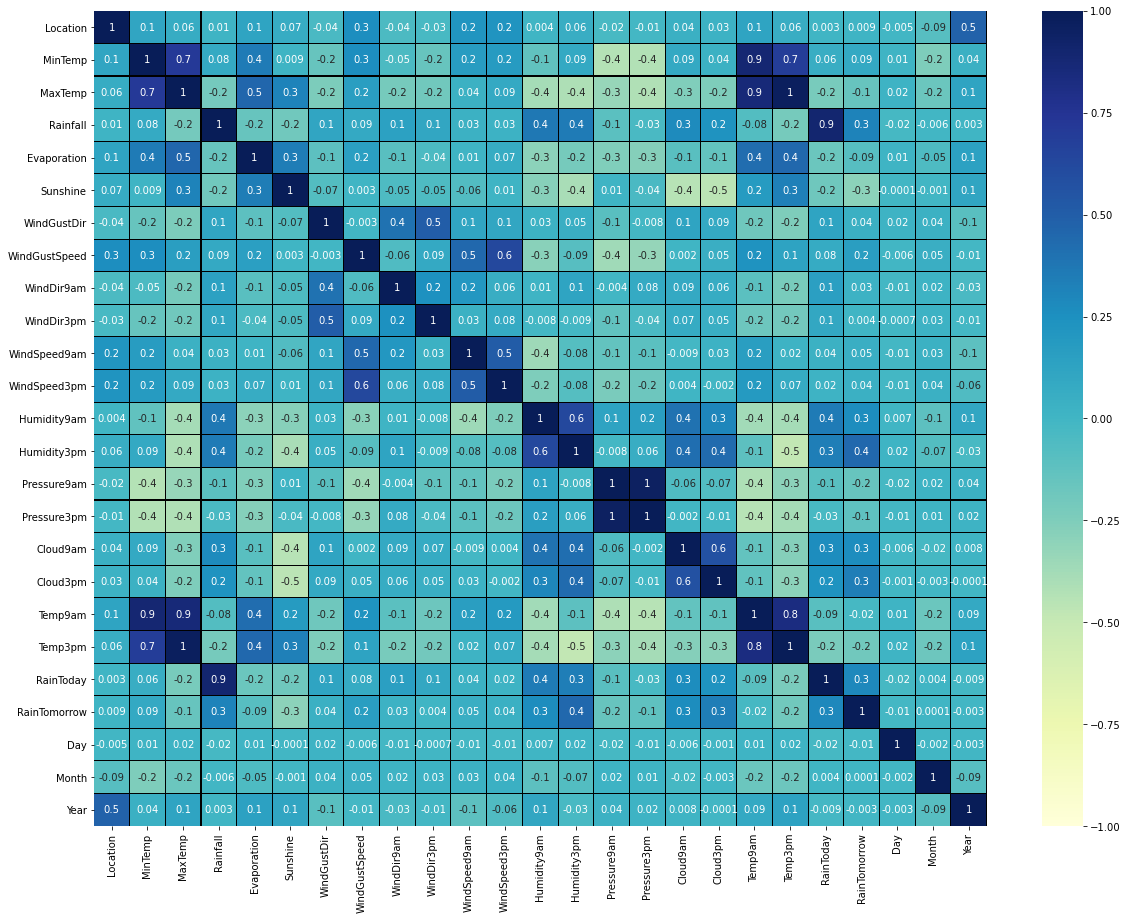

In [54]:
plt.figure(figsize=(20,15))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [55]:
cor['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.445891
Cloud3pm         0.337922
Rainfall         0.317142
RainToday        0.294528
Humidity9am      0.269722
Cloud9am         0.269598
WindGustSpeed    0.161878
MinTemp          0.091021
WindSpeed9am     0.048750
WindGustDir      0.044378
WindSpeed3pm     0.042472
WindDir9am       0.027091
Location         0.009222
WindDir3pm       0.003674
Month            0.000135
Year            -0.003180
Day             -0.012493
Temp9am         -0.021459
Evaporation     -0.087821
Pressure3pm     -0.124953
MaxTemp         -0.149708
Pressure9am     -0.152692
Temp3pm         -0.191706
Sunshine        -0.293951
Name: RainTomorrow, dtype: float64

Here we can clearly see that humidy has the highest corelation with raintomorrow.

In [56]:
cor['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.902769
Humidity9am      0.374141
Humidity3pm      0.357797
RainTomorrow     0.317142
Cloud9am         0.278194
Cloud3pm         0.240747
WindDir9am       0.148138
WindGustDir      0.116389
WindDir3pm       0.103933
WindGustSpeed    0.086445
MinTemp          0.080984
WindSpeed9am     0.032173
WindSpeed3pm     0.026797
Location         0.013354
Year             0.002860
Month           -0.005666
Day             -0.016476
Pressure3pm     -0.034828
Temp9am         -0.076736
Pressure9am     -0.108548
Evaporation     -0.151081
Sunshine        -0.189936
MaxTemp         -0.206494
Temp3pm         -0.215864
Name: Rainfall, dtype: float64

Here we can clearly see that Rain today has highest relation with Rainfall.

# Visualizing the correlation between label and features using bar plot

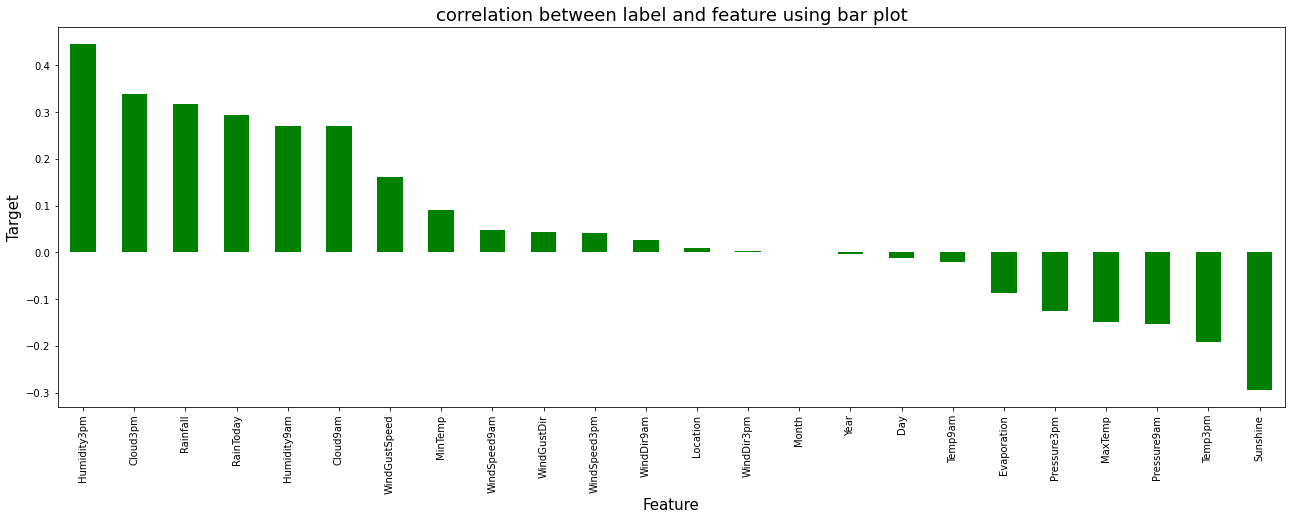

In [57]:
plt.figure(figsize=(22,7))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

# Prediction for Rain-Tomorrow

# Data Pre-processing

# Splitting feature and label into x and y

In [58]:
x = new_df.drop("RainTomorrow", axis=1)
y = new_df["RainTomorrow"]

Here we have seperated the feature and the label.

# Feature Scaling using Standard Scalarization

In [59]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,-0.001029,0.2832,0.169416,1.229267,0.485042,1.250245,1.400214,0.742680,0.638072,0.184123,-1.624174,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.543392,0.2832,0.169416,1.441960,0.485042,-0.277857,1.626597,-0.771299,0.421555,-1.455097,-1.457752,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.543392,0.2832,0.169416,1.654654,0.615247,1.250245,1.626597,0.691207,0.854590,-1.819368,-1.180382,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.543392,0.2832,0.169416,-0.684977,-1.274926,0.377044,-1.769138,0.152299,-0.985811,-1.394385,-1.957019,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.256468,0.2832,0.169416,1.229267,0.278462,-1.369358,-0.184462,-0.275457,0.205037,0.851954,-1.013959,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.543392,0.2832,0.169416,-1.535751,-0.535770,0.377044,-1.542755,0.314924,-0.769293,-1.030114,-1.513226,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.543392,0.2832,0.169416,-0.259589,-1.524590,0.377044,-1.089991,0.314924,-0.985811,-0.726555,-1.679648,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.543392,0.2832,0.169416,-0.897670,-0.021211,0.377044,1.400214,-0.040046,-0.985811,-0.908690,-1.513226,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.543392,0.2832,0.169416,0.378492,-0.830522,0.595344,-1.089991,0.314924,-1.202329,-1.030114,-1.513226,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


The dataset has been now scaled.

# Checking VIF (Multicolinearity)

In [60]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.591950,Location
1,8.763864,MinTemp
2,26.351310,MaxTemp
3,5.619158,Rainfall
4,1.505020,Evaporation
5,1.633523,Sunshine
6,1.621681,WindGustDir
7,2.158495,WindGustSpeed
8,1.397334,WindDir9am
9,1.493832,WindDir3pm


We can see that we have high multicolinearity in features: MaxTemp, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [61]:
# Dropping Temp3pm column
x.drop("Temp3pm",axis=1,inplace=True)

In [62]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.590914,Location
1,8.725374,MinTemp
2,9.618350,MaxTemp
3,5.616245,Rainfall
4,1.503205,Evaporation
5,1.632528,Sunshine
6,1.618586,WindGustDir
7,2.151185,WindGustSpeed
8,1.396733,WindDir9am
9,1.492748,WindDir3pm


In [63]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [64]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.590819,Location
1,8.576956,MinTemp
2,9.205668,MaxTemp
3,5.604577,Rainfall
4,1.491358,Evaporation
5,1.632164,Sunshine
6,1.603541,WindGustDir
7,2.132035,WindGustSpeed
8,1.373054,WindDir9am
9,1.426346,WindDir3pm


In [65]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [66]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.589072,Location
1,4.530225,MinTemp
2,5.347522,MaxTemp
3,5.595027,Rainfall
4,1.485802,Evaporation
5,1.627447,Sunshine
6,1.601592,WindGustDir
7,2.090701,WindGustSpeed
8,1.372795,WindDir9am
9,1.426023,WindDir3pm


Now we can see that we have removed all the multi-colinearity and it dont exist in the dataset.

# Oversampling

In [67]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

We can see that there is a significant difference in the classes hence lets fix this usin g SMOTE.

In [68]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [69]:
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

Now we can see that the oversampling issue has been fixed.

In [70]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Finding the best random state

In [71]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9378210327115437  on Random_state  84


# Feature Importance

In [72]:
# Lets ckeck the feature importance using Random Forest Regressor

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Humidity3pm,0.154
Cloud3pm,0.089
Rainfall,0.066
Humidity9am,0.061
Sunshine,0.061
WindGustSpeed,0.055
Cloud9am,0.054
Pressure3pm,0.045
MinTemp,0.041


With the help of Random Forest Classifier we are able to list down the importance or priority given to a feature as per it's involvement or weightage in predicting our label.

# Creating train_test split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Modelling

# Logistic Regression Base Line Model

In [74]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Prediction
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7745336577453366
[[1429  416]
 [ 418 1436]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1845
           1       0.78      0.77      0.77      1854

    accuracy                           0.77      3699
   macro avg       0.77      0.77      0.77      3699
weighted avg       0.77      0.77      0.77      3699



# Random Forest Classifier

In [75]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.9370100027034334
[[1726  119]
 [ 114 1740]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1845
           1       0.94      0.94      0.94      1854

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



# AdaBoost Classifier

In [76]:
# Checking accuracy for AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

# Prediction
predabc = abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test,predabc))

0.8175182481751825
[[1484  361]
 [ 314 1540]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1845
           1       0.81      0.83      0.82      1854

    accuracy                           0.82      3699
   macro avg       0.82      0.82      0.82      3699
weighted avg       0.82      0.82      0.82      3699



# Gradient Boosting Classifier

In [77]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

0.8642876453095432
[[1582  263]
 [ 239 1615]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1845
           1       0.86      0.87      0.87      1854

    accuracy                           0.86      3699
   macro avg       0.86      0.86      0.86      3699
weighted avg       0.86      0.86      0.86      3699



# Extra Trees Classifier

In [78]:
# Checking accuracy for ExtraTreesClassifier
xtc = ExtraTreesClassifier()
xtc.fit(x_train,y_train)

# Prediction
predxtc = xtc.predict(x_test)

print(accuracy_score(y_test, predxtc))
print(confusion_matrix(y_test, predxtc))
print(classification_report(y_test,predxtc))

0.9434982427683157
[[1722  123]
 [  86 1768]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1845
           1       0.93      0.95      0.94      1854

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



# Cross Validation Score

In [79]:
# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rf,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(abc,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier:',cross_val_score(gb,x,y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier:',cross_val_score(xtc,x,y,cv=5).mean())

Logistic Regression: 0.7092457420924575
Random Forest Classifier: 0.7906731549067315
AdaBoosting Classifier: 0.6713706407137063
Gradient Boosting Classifier: 0.6802108678021087
Extra Trees Classifier: 0.7928629359286294


We can see from the accuracy score of the models and after cross validation, ExtraTress is the best fit model.

# HyperParameter Tuning of the best fit model

In [80]:
# ExtraTrees Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [81]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [82]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [83]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [84]:
Rainfall_Tomorrow=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=1000)
Rainfall_Tomorrow.fit(x_train, y_train)
pred = Rainfall_Tomorrow.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

93.99837793998378


After Hyperparameter Tuning the score has increased to 93.99%

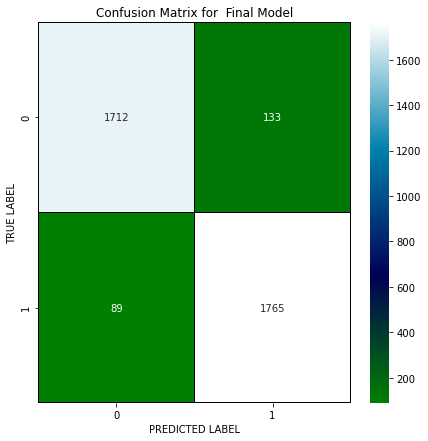

In [85]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show() 

# Plotting ROC and Compare AUC for the best model

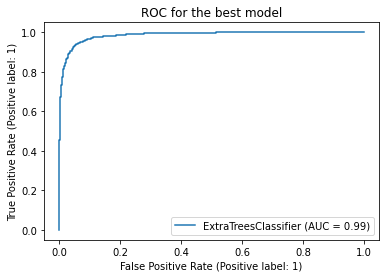

In [86]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Rainfall_Tomorrow, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving the Model

In [87]:
import joblib
joblib.dump(Rainfall_Tomorrow,"Prediction_of_Rainfall_Tomorrow.pkl")

['Prediction_of_Rainfall_Tomorrow.pkl']

# Predicting the saved model


In [88]:
# Loading the saved model
model=joblib.load("Prediction_of_Rainfall_Tomorrow.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, ..., 1, 0, 1])

In [89]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T


,Predicted,Original
0,0,0
1,1,0
2,1,1
3,1,1
4,0,0
...,...,...
3694,0,0
3695,1,1
3696,1,1
3697,0,0


We can see that the Actual Value and Predicted Value is almost same

# Prediction for Rainfall

# Data Preprocessing Again

# Splitting the label and feature

In [90]:
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.470004,1.85464,2.1555,13,3.806662,13,14,3.044522,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.000000,1.85464,2.1555,14,3.806662,6,15,1.609438,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.000000,1.85464,2.1555,15,3.850148,13,15,2.995732,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.000000,1.85464,2.1555,4,3.218876,9,0,2.484907,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,0.693147,1.85464,2.1555,13,3.737670,1,7,2.079442,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [91]:
x = new_df.drop("Rainfall", axis=1)
y = new_df["Rainfall"]

# Feature Scaling using Standard Scalarization

In [92]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.2832,0.169416,1.229267,0.485042,1.250245,1.400214,0.742680,0.638072,0.184123,-1.624174,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.2832,0.169416,1.441960,0.485042,-0.277857,1.626597,-0.771299,0.421555,-1.455097,-1.457752,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.2832,0.169416,1.654654,0.615247,1.250245,1.626597,0.691207,0.854590,-1.819368,-1.180382,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.2832,0.169416,-0.684977,-1.274926,0.377044,-1.769138,0.152299,-0.985811,-1.394385,-1.957019,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.2832,0.169416,1.229267,0.278462,-1.369358,-0.184462,-0.275457,0.205037,0.851954,-1.013959,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,0.2832,0.169416,-1.535751,-0.535770,0.377044,-1.542755,0.314924,-0.769293,-1.030114,-1.513226,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,0.2832,0.169416,-0.259589,-1.524590,0.377044,-1.089991,0.314924,-0.985811,-0.726555,-1.679648,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,0.2832,0.169416,-0.897670,-0.021211,0.377044,1.400214,-0.040046,-0.985811,-0.908690,-1.513226,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,0.2832,0.169416,0.378492,-0.830522,0.595344,-1.089991,0.314924,-1.202329,-1.030114,-1.513226,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635,0.942990,-0.123726,2.004134


# Checking VIF (Multicolinearity)

In [93]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.602216,Location
1,8.776052,MinTemp
2,26.340651,MaxTemp
3,1.505386,Evaporation
4,1.647674,Sunshine
5,1.623987,WindGustDir
6,2.216485,WindGustSpeed
7,1.396968,WindDir9am
8,1.495284,WindDir3pm
9,1.814908,WindSpeed9am


We see multicolinearity exist in MaxTemp, Temp9am, Temp3pm, Pressure9am,Pressure3pm.

In [94]:
# Dropping MaxTemp column
x.drop("MaxTemp",axis=1,inplace=True)

In [95]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.600105,Location
1,8.762938,MinTemp
2,1.502767,Evaporation
3,1.641266,Sunshine
4,1.623369,WindGustDir
5,2.206998,WindGustSpeed
6,1.394553,WindDir9am
7,1.494076,WindDir3pm
8,1.814058,WindSpeed9am
9,1.964154,WindSpeed3pm


In [96]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [97]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.600020,Location
1,8.597799,MinTemp
2,1.489207,Evaporation
3,1.640480,Sunshine
4,1.610549,WindGustDir
5,2.187804,WindGustSpeed
6,1.372896,WindDir9am
7,1.432629,WindDir3pm
8,1.804904,WindSpeed9am
9,1.951201,WindSpeed3pm


In [98]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [99]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.599476,Location
1,4.956734,MinTemp
2,1.484270,Evaporation
3,1.633260,Sunshine
4,1.605885,WindGustDir
5,2.166456,WindGustSpeed
6,1.372360,WindDir9am
7,1.432534,WindDir3pm
8,1.794714,WindSpeed9am
9,1.910324,WindSpeed3pm


Now we can see that there is no vif values more then 10, hence multicolinearity issue has been resolved.

# Finding the best random state

In [100]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)


Maximum r2 score is  0.8869041560143006  on Random_state  195


# Feature Importance

In [101]:
# Lets ckeck the feature importance using Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
RainToday,0.808
Humidity9am,0.020
MinTemp,0.019
Pressure3pm,0.013
WindSpeed9am,0.012
Humidity3pm,0.012
Day,0.012
Temp3pm,0.012
WindGustSpeed,0.011


With the help of Random Forest Regressor we are able to list down the importance or priority given to a feature as per it's involvement or weightage in predicting our label.

# Creating train test split

# Random Forest Regressor

In [102]:
# Checking R2 score for Random Forest Regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_Score:',r2_score(y_test,predrf))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predrf))
print('MSE:',metrics.mean_squared_error(y_test, predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 0.8773137706319161
MAE: 0.1563913657899807
MSE: 0.0959824095700016
RMSE: 0.3098102799617882


# Decision Tree Regressor

In [103]:
# Checking R2 score for Decision Tree Regressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

# prediction
preddt=dt.predict(x_test)
print('R2_Score:',r2_score(y_test,preddt))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, preddt))
print('MSE:',metrics.mean_squared_error(y_test, preddt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddt)))

R2_Score: 0.7878111801287895
MAE: 0.1657444013425042
MSE: 0.1660039135602616
RMSE: 0.40743577844890055


# GradientBoosting Regressor

In [104]:
# Checking R2 score for GradientBoosting Regressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.8510999751792814
MAE: 0.18318769984359853
MSE: 0.11649052416834273
RMSE: 0.34130708191940984


# BaggingRegressor

In [105]:
br=BaggingRegressor()
br.fit(x_train,y_train)

# prediction
predbr=br.predict(x_test)
print('R2_Score:',r2_score(y_test,predbr))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predbr))
print('MSE:',metrics.mean_squared_error(y_test, predbr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 0.8596500472648034
MAE: 0.16253208521075696
MSE: 0.10980145625100154
RMSE: 0.3313630278878462


# ExtraTrees Regressor

In [106]:
# Checking R2 score for Extra Trees Regressor

et=ExtraTreesRegressor()
et.fit(x_train,y_train)

# prediction
predet=et.predict(x_test)
print('R2_Score:',r2_score(y_test,predet))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predet))
print('MSE:',metrics.mean_squared_error(y_test, predet))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predet)))

R2_Score: 0.8821711287318369
MAE: 0.13632293708696638
MSE: 0.09218230146515469
RMSE: 0.3036153841048814


# Cross-Validation

In [107]:
# Checking cv score for Random Forest Regressor
print('Random Forest:',cross_val_score(rf,x,y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print('Decision Tree:',cross_val_score(dt,x,y,cv=5).mean())

# Checking cv score for Gradient Boosting Regressor
print('Gradient Boosting:',cross_val_score(gb,x,y,cv=5).mean())

# Checking cv score for Bagging Regressor
print('Bagging Regressor:',cross_val_score(br,x,y,cv=5).mean())

# Checking cv score for ExtraTreesRegressor
print('ExtraTreesRegressor:',cross_val_score(et,x,y,cv=5).mean())


Random Forest: 0.8533961565058024
Decision Tree: 0.7180812392859435
Gradient Boosting: 0.8290123907481858
Bagging Regressor: 0.8409039233640803
ExtraTreesRegressor: 0.8615443075030538


Here we have got the cross-validation scores.

Based on the model score and the cross val score we have found that ExtraTreesRegressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

# Hyper parameter tuning

In [108]:
#ExtraTrees Regressor

parameters = {'n_estimators' : [50,100,200],
              'criterion' :['mse', 'mae'],
              'max_depth' : [4, 6, 8]}

In [109]:
GCV=GridSearchCV(et,parameters,cv=5)

In [110]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [4, 6, 8],
                         'n_estimators': [50, 100, 200]})

In [111]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 8, 'n_estimators': 200}

In [116]:
Rainfall = ExtraTreesRegressor(criterion='mse', max_depth=8, n_estimators=100)
Rainfall.fit(x_train, y_train)
pred = Rainfall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 85.74692915313263
RMSE value: 0.3339274619507748
MAE: 0.17851253281690402
MSE: 0.11150754984488612


After Hyperparameter Tuning, we have got the accuracy score of 85.74%

# Saving the model

In [117]:
import joblib
joblib.dump(Rainfall,"Prediction_of_Rainfall.pkl")

['Prediction_of_Rainfall.pkl']

# Predicting the saved model

In [118]:
# Loading the saved model
model=joblib.load("Prediction_of_Rainfall.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0.04663424, 0.02608822, 2.17388211, ..., 0.06020923, 0.03028829,
       0.03067909])

In [119]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0.046634,0.000000
1,0.026088,0.000000
2,2.173882,2.721295
3,0.036923,0.000000
4,0.017621,0.000000
...,...,...
2392,0.030989,0.000000
2393,0.104678,0.182322
2394,0.060209,0.000000
2395,0.030288,0.470004


# Model Building and Prediction:
# Final Score for Rainfall Tomorrow is : 93.99%
# Final Score for Rainfall is: 85.74%
